# Jimmy Wrangler 
### Traveling the world on a mission to discover new data

Fight songs are a popular way for fans to cheer for their teams.  Maybe the fight song is a major factor in how well a team plays basket ball.  To answer this question, we'll be exploring the connection between fight songs and 2018 Men's March Madness Predictions using Jupyter Notebooks and Pandas.

Sources:
- Fight-Songs: https://github.com/fivethirtyeight/data/tree/master/fight-songs
- 2018 March-Madness Predictions: https://github.com/fivethirtyeight/data/tree/master/march-madness-predictions-2018
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
fight_songs = pd.read_csv('./data/raw/fight-songs.csv')
forecasts = pd.read_csv('./data/raw/fivethirtyeight_ncaa_forecasts.csv')

## Fight Songs Data Set Info
This data set contains info on the fight song from schools in the NCAA.

In [2]:
fight_songs.keys()

Index(['school', 'conference', 'song_name', 'writers', 'year',
       'student_writer', 'official_song', 'contest', 'bpm', 'sec_duration',
       'fight', 'number_fights', 'victory', 'win_won', 'victory_win_won',
       'rah', 'nonsense', 'colors', 'men', 'opponents', 'spelling',
       'trope_count', 'spotify_id'],
      dtype='object')

**Column definitions** 

*(info on ```fight_song.keys()```)*

| Column   | Description |
| :---------| :---------------
| `school`| School name |
| `conference`| School college football conference |
| `song_name`| Song title |
| `writers`| Song author |
| `year`| Year the song written. Some values are `Unknown` |
| `student_writer`| Was the author a student? Some values are `Unknown` |
| `official_song`| Is the song the official fight song according to the university? |
| `contest`| Was the song chosen as the result of a contest? |
| `bpm`| Beats per minute |
| `sec_duration`| Duration of song in seconds |
| `fight`| Does the song say “fight”? |
| `number_fights`| Number of times the song says “fight”? |
| `victory`| Does the song say “victory”? |
| `win_won`| Does the song say “win” or “won”?  |
| `victory_win_won`| Does the song say “victory,” “win” or “won”?  |
| `rah`| Does the song say “rah”? |
| `nonsense`| Does the song use nonsense syllables (e.g. "Whoo-Rah" or "Hooperay") |
| `colors`| Does the song mention the school colors?  |
| `men`| Does the song refer to a group of men (e.g. men, boys, sons, etc.)? |
| `opponents`| Does the song mention any opponents? |
| `spelling`| Does the song spell anything? |
| `trope_count`| Total number of tropes |
| `spotify_id`| Spotify id for the song |

In [3]:
fight_songs.head()

,school,conference,song_name,writers,year,student_writer,official_song,contest,bpm,sec_duration,...,win_won,victory_win_won,rah,nonsense,colors,men,opponents,spelling,trope_count,spotify_id
0,Notre Dame,Independent,Victory March,Michael J. Shea and John F. Shea,1908,No,Yes,No,152,64,...,Yes,Yes,Yes,No,Yes,Yes,No,No,6,15a3ShKX3XWKzq0lSS48yr
1,Baylor,Big 12,Old Fight,Dick Baker and Frank Boggs,1947,Yes,Yes,No,76,99,...,Yes,Yes,No,No,Yes,No,No,Yes,5,2ZsaI0Cu4nz8DHfBkPt0Dl
2,Iowa State,Big 12,Iowa State Fights,"Jack Barker, Manly Rice, Paul Gnam, Rosalind K...",1930,Yes,Yes,No,155,55,...,No,No,Yes,No,No,Yes,No,Yes,4,3yyfoOXZQCtR6pfRJqu9pl
3,Kansas,Big 12,I'm a Jayhawk,"George ""Dumpy"" Bowles",1912,Yes,Yes,No,137,62,...,No,No,No,Yes,No,Yes,Yes,No,3,0JzbjZgcjugS0dmPjF9R89
4,Kansas State,Big 12,Wildcat Victory,Harry E. Erickson,1927,Yes,Yes,No,80,67,...,No,Yes,No,No,Yes,No,No,No,3,4xxDK4g1OHhZ44sTFy8Ktm


And let's also print some additional detail about the dataset:

In [4]:
fight_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 23 columns):
school             65 non-null object
conference         65 non-null object
song_name          65 non-null object
writers            65 non-null object
year               65 non-null object
student_writer     65 non-null object
official_song      65 non-null object
contest            65 non-null object
bpm                65 non-null int64
sec_duration       65 non-null int64
fight              65 non-null object
number_fights      65 non-null int64
victory            65 non-null object
win_won            65 non-null object
victory_win_won    65 non-null object
rah                65 non-null object
nonsense           65 non-null object
colors             65 non-null object
men                65 non-null object
opponents          65 non-null object
spelling           65 non-null object
trope_count        65 non-null int64
spotify_id         65 non-null object
dtypes: int64(4), object(19

## NCAA Forecasts Dataset Info

In [5]:
forecasts.keys()

Index(['gender', 'forecast_date', 'playin_flag', 'rd1_win', 'rd2_win',
       'rd3_win', 'rd4_win', 'rd5_win', 'rd6_win', 'rd7_win', 'team_alive',
       'team_id', 'team_name', 'team_rating', 'team_region', 'team_seed'],
      dtype='object')

**Column definitions** 

*(info on ```fight_song.keys()```)*

| Column   | Description |
| :---------| :---------------
| `gender`| Men's vs Women's League |
| `forecast_date`| Date the forecast was made on |
| `playin_flag`| For wildcards |
| `rd[1-7]_win`| Likelyhood of winning the [1-7]th game |
| `team_alive`| Whether the team was still in the tournament at a given forecast |
| `team_id`| Arbitrary team id |
| `team_name`| School's name |
| `team_rating`| Relative power rating of teams on 100 point scale |
| `team_region`| Geographic region of team |
| `team_seed`| Bracket seed of team |


As is, the data for prediction provides updated chance to win after each stage of play.  The first 68 rows correspond to the final round of play, with the ```rd7_win``` column having 0 likely hood for the teams already knocked out.

In [6]:
forecasts.head(68)

,gender,forecast_date,playin_flag,rd1_win,rd2_win,rd3_win,rd4_win,rd5_win,rd6_win,rd7_win,team_alive,team_id,team_name,team_rating,team_region,team_seed
0,mens,2018-03-31,0,1.0,1.0,1.0,1.0,1.0,1.0,0.64439,1,222,Villanova,97.66,East,1
1,mens,2018-03-31,0,1.0,1.0,1.0,1.0,1.0,1.0,0.35561,1,130,Michigan,93.98,West,3
2,mens,2018-03-31,0,1.0,1.0,1.0,1.0,1.0,0.0,0.00000,0,2350,Loyola (IL),87.27,South,11
3,mens,2018-03-31,0,1.0,1.0,1.0,1.0,1.0,0.0,0.00000,0,2305,Kansas,92.37,Midwest,1
4,mens,2018-03-31,0,1.0,1.0,1.0,1.0,0.0,0.0,0.00000,0,2306,Kansas State,87.40,South,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,mens,2018-03-31,0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,2239,Cal State Fullerton,71.88,East,15
64,mens,2018-03-31,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,2428,North Carolina Central,65.30,West,16a
65,mens,2018-03-31,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,9,Arizona State,81.26,Midwest,11a
66,mens,2018-03-31,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0,2341,Long Island University,67.64,East,16a


Similarly, the next 68 rows correspond to the final four game predictions. The 68 rows after that, the Elite Eight and so on.

## Filtering Data
We currently have predictions at every stage of the tournament, but we'll want to just analyze teams based on performance at one point in time (beginning or end), or based on the total wins throughout the tournament.

In [7]:
men_beginning = forecasts[(forecasts.forecast_date == '2018-03-12') & (forecasts.gender == 'mens')]
men_beginning_simple = men_beginning.filter(items=["team_name","team_rating", "team_region"])
men_beginning_simple

,team_name,team_rating,team_region
748,Villanova,94.92,East
749,Virginia,93.07,South
750,Duke,92.59,Midwest
751,Kansas,90.88,Midwest
752,Michigan State,91.67,Midwest
...,...,...,...
811,Radford,70.89,East
812,Cal State Fullerton,71.88,East
813,Texas Southern,67.93,West
814,Long Island University,67.64,East


In [8]:
songs_simplified = fight_songs.filter(items=['school','bpm','trope_count','sec_duration','year'])
songs_simplified

,school,bpm,trope_count,sec_duration,year
0,Notre Dame,152,6,64,1908
1,Baylor,76,5,99,1947
2,Iowa State,155,4,55,1930
3,Kansas,137,3,62,1912
4,Kansas State,80,3,67,1927
...,...,...,...,...,...
60,Pitt,79,6,110,1911
61,Syracuse,137,6,85,1914
62,Virginia,112,3,42,1893
63,Virginia Tech,133,5,71,1919


## Joining
We'll join the data on the school name.  For the data sets we've chosen, we have 68 rows in the forecasted group, and we have 65 rows in the fight song data.  After our outer join however, we're only left with 29 schools.  Note that later on we'll have to clean the data due to misformatted year type and an incomplete field.

In [9]:
j = songs_simplified.merge(men_beginning_simple, left_on="school", right_on="team_name").drop(columns ="team_name")
j.sort_values(by='team_rating')

,school,bpm,trope_count,sec_duration,year,team_rating,team_region
18,Missouri,138,3,86,1946,78.49,West
11,Arizona State,150,4,106,1948,81.26,Midwest
1,Kansas State,80,3,67,1927,81.48,South
25,North Carolina State,90,3,82,1961,81.74,Midwest
26,Syracuse,137,6,85,1914,81.86,Midwest
2,Oklahoma,153,2,37,1905,82.10,Midwest
13,Alabama,153,6,59,1926,82.20,East
3,Texas,81,4,65,1923,82.90,South
12,UCLA,72,5,69,1959,83.22,East
14,Arkansas,77,3,88,1913,83.29,East


## Visualizing
Now that we have some interesting data set, we can go ahead and visualize it.  We'll try and see if there's anything relating features of a the songs to the performance or geographical region of the team.
### Rating vs BPM
Not super interesting, it does seem that teams with low bpm's tend towards average team ratings.

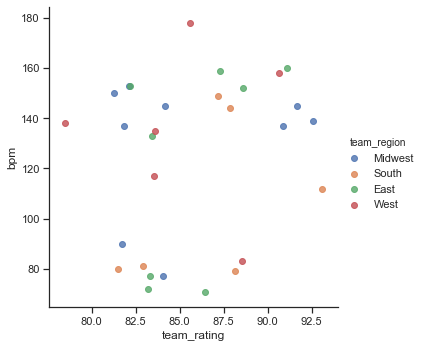

In [10]:
sns.lmplot(x='team_rating',y='bpm',data=j, fit_reg=False, hue='team_region')

### Rating vs Trope Count
Again, the information here doesn't give us a great insight into a relationship between how corny the fight song is and the performance of the team.

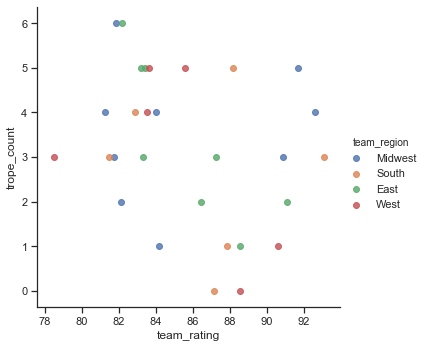

In [11]:
sns.lmplot(x='team_rating',y='trope_count',data=j, fit_reg=False, hue='team_region')

### Rating vs Age of Song
Due to an unknown year of song creation for North Carolina, we removed that data point and then converted the data to an int type for ordering.  Still not a lot interesting, but there are once again distinct groups between 'old songs' and 'newer songs'.

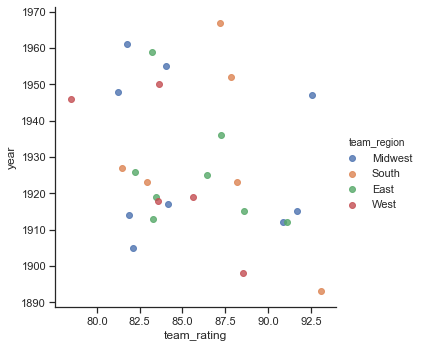

In [12]:
j_clean = j.query("year != 'Unknown'").astype({'year':'int32'})
sns.lmplot(x='team_rating',y='year',data=j_clean, fit_reg=False, hue='team_region')

## Conclusion
While fight songs are an important part of the sporting experience and may give team members a push in the last minutes of a tight game, it seems that the fight songs plays no obvious part in the performance rating of teams in the NCAA.